In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from functions import plot_formation

In [2]:
mat_file_path = './FC_data/data.mat'
mat_data = scipy.io.loadmat(mat_file_path)

In [3]:
K = int(mat_data['K'][0][0])                    # number of iterations
L = mat_data['L']                               # NxN edge weights
M = int(mat_data['M'][0][0])                    # number of edges
N = int(mat_data['N'][0][0])                    # number of agents
R = mat_data['R']                               # covariance matrix
dt = float(mat_data['dt'][0][0])                # timestep
z0 = mat_data['z']                               # Nx2 actual positions 
z_star = mat_data['z_star']                     # Nx2 target positions

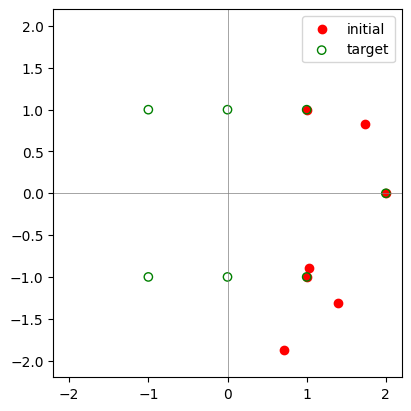

In [4]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,4))
ax.axvline(0, color='gray', lw=0.5)
ax.axhline(0, color='gray', lw=0.5)
ax.scatter(z0[:,0], z0[:,1], c='r', label='initial')
ax.scatter(z_star[:,0], z_star[:,1], c='None', edgecolors='g', label='target')
lim = 1.1*np.max(np.abs(z0))
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.legend()

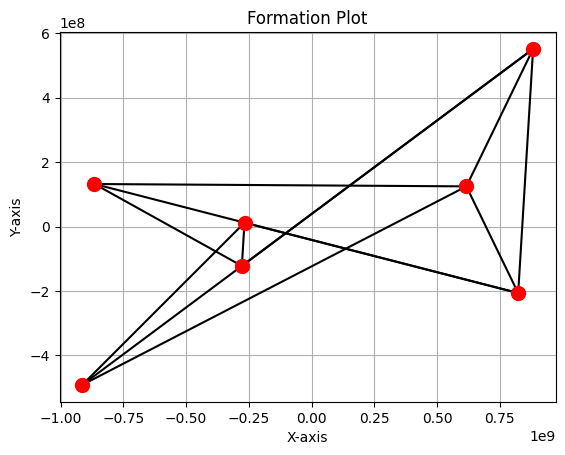

array([[ 0.27407548, -0.27407548, -0.27407548,  0.13703774,  0.13703774,
         0.        ,  0.        ],
       [-0.27407548,  0.68518871,  0.        , -0.54815097,  0.        ,
         0.        ,  0.13703774],
       [-0.27407548,  0.        ,  0.68518871,  0.        , -0.54815097,
         0.13703774,  0.        ],
       [ 0.13703774, -0.54815097,  0.        ,  0.75370758, -0.06851887,
        -0.27407548,  0.        ],
       [ 0.13703774,  0.        , -0.54815097, -0.06851887,  0.75370758,
         0.        , -0.27407548],
       [ 0.        ,  0.        ,  0.13703774, -0.27407548,  0.        ,
         0.27407548, -0.13703774],
       [ 0.        ,  0.13703774,  0.        ,  0.        , -0.27407548,
        -0.13703774,  0.27407548]])

In [5]:
k = 0
z = np.zeros((N, 2, K+2))  # Position matrix over time
z[:, :, 0] = z0            # Initialize positions

while k <= K:
    for i in range(N):
        # Get the neighbors of agent i (non-zero weights in row i of L)
        neighbors = np.nonzero(L[i, :])[0]
        
        # Compute the control input by summing over neighbors
        u = np.zeros(2)  # Initialize control input for agent i
        for j in neighbors:
            u += - L[i, j] * (z[i, :, k] - z[j, :, k])
        
        # Update position of agent i
        z[i, :, k+1] = z[i, :, k] + dt * u
    
    k += 1

z_final = z[:, :, K]

plot_formation(z_final)

L


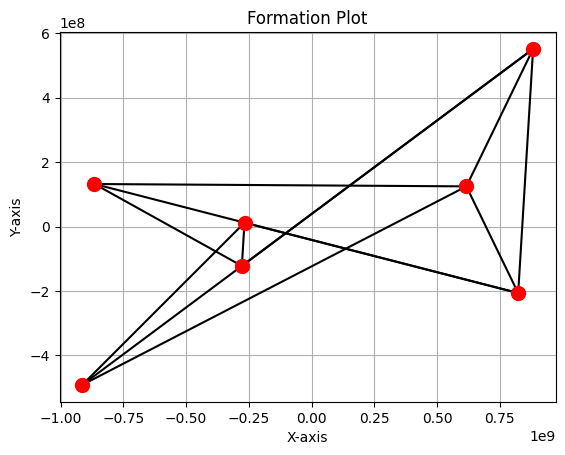

In [6]:
plot_formation(z_final)